<a href="https://colab.research.google.com/github/uxman-ali/-Brazilian-Sales-Performance-Dashboard-/blob/main/BA_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [10]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [11]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [12]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [13]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [14]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [15]:
df.describe()
df.dtypes


,0
num_passengers,int64
sales_channel,object
trip_type,object
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,int64
route,object
booking_origin,object
wants_extra_baggage,int64


In [16]:
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'route', 'booking_origin'], drop_first=True)


In [18]:
from sklearn.model_selection import train_test_split

X = df.drop("booking_complete", axis=1)  # Features
y = df["booking_complete"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.85


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(20, 500))
sns.barplot(x=feature_importance, y=features, orient='h')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [29]:
print(X.columns)

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'sales_channel_Mobile',
       ...
       'booking_origin_Timor-Leste', 'booking_origin_Tonga',
       'booking_origin_Tunisia', 'booking_origin_Turkey',
       'booking_origin_Ukraine', 'booking_origin_United Arab Emirates',
       'booking_origin_United Kingdom', 'booking_origin_United States',
       'booking_origin_Vanuatu', 'booking_origin_Vietnam'],
      dtype='object', length=913)


In [31]:
print([col for col in X.columns if "sales_channel" in col])
print([col for col in X.columns if "trip_type" in col])


['sales_channel_Mobile']
['trip_type_OneWay', 'trip_type_RoundTrip']


In [32]:
low_impact_features = [col for col in X.columns if 'route_' in col]

# Dynamically add sales_channel and trip_type columns if they exist
for feature in ['sales_channel_Mobile', 'trip_type_OneWay', 'trip_type_RoundTrip']:
    if feature in X.columns:
        low_impact_features.append(feature)

X_refined = X.drop(columns=low_impact_features)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 914 entries, num_passengers to booking_origin_Vietnam
dtypes: bool(904), float64(1), int64(9)
memory usage: 46.9 MB


In [37]:
X_test_refined = X_test.drop(columns=low_impact_features, errors='ignore')

y_pred = model.predict(X_test_refined)
accuracy = accuracy_score(y_test, y_pred)
print(f"New Model Accuracy: {accuracy:.2f}")


New Model Accuracy: 1.00


**Over Model is Ovefitted**

In [38]:
print(X_train.shape, X_test.shape)
print(set(X_train.columns) - set(X_test.columns))

(40000, 913) (10000, 913)
set()


In [39]:
important_feature = feature_importance.argsort()[-50:] #keeping top 50
X_refined = X.iloc[:, important_feature]

**Using Cross Validation**

In [41]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(model, X_refined, y, cv=5)
print(f"Cross-Validation Score: {cv_score.mean():.2f}")
print("Mean CV Accuracy ", cv_score.mean())

Cross-Validation Score: 0.71
Mean CV Accuracy  0.7058799999999998


**Hyperparameter Tuning**

In [45]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = RandomizedSearchCV(model, param_grid, cv=5, n_jobs=1, random_state=42)
grid_search.fit(X_refined, y)


print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5}


**Training the Model With Optimized Hyperparameters**

In [46]:
best_model = RandomForestClassifier(n_estimators=50, min_samples_split=5,
                                    min_samples_leaf=2, max_depth=5, random_state=42)
best_model.fit(X_refined, y)


RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, random_state=42)

**Evaluating Model Performance**

In [48]:
X_test = X_test[X_refined.columns]  # Align columns


In [52]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.2f}")

Optimized Model Accuracy: 0.85


In [53]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

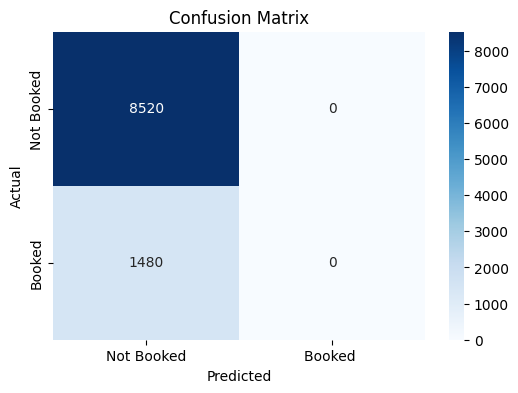

In [56]:
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (6, 4))

sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=['Not Booked', 'Booked '], yticklabels=['Not Booked', 'Booked'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [58]:
y.value_counts()

,count
booking_complete,
0,42522
1,7478


In [59]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_refined, y)

In [60]:
from collections import Counter
print(Counter(y_resampled))


Counter({0: 42522, 1: 42522})


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [62]:
y_pred = best_model.predict(X_test)
print("Optimized Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Optimized Model Accuracy: 0.49644305955670526
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      8444
           1       0.00      0.00      0.00      8565

    accuracy                           0.50     17009
   macro avg       0.25      0.50      0.33     17009
weighted avg       0.25      0.50      0.33     17009



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
  from collections import Counter
print("Class Distribution After SMOTE:", Counter(y_resampled))


Class Distribution After SMOTE: Counter({0: 42522, 1: 42522})


In [64]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_refined, y)


In [65]:
best_model.fit(X_resampled, y_resampled)
y_pred = best_model.predict(X_test)
print("New Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

New Accuracy: 0.7671232876712328
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      8444
           1       0.77      0.76      0.77      8565

    accuracy                           0.77     17009
   macro avg       0.77      0.77      0.77     17009
weighted avg       0.77      0.77      0.77     17009



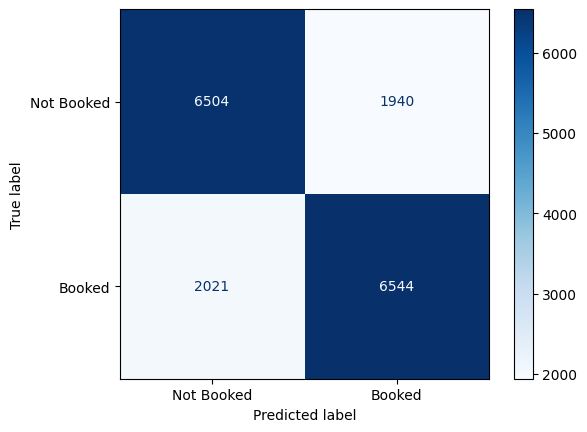

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Booked', 'Booked'])
disp.plot(cmap='Blues', values_format='d')



In [68]:
print("Training features:", X_train.columns)
print("Testing features:", X_test.columns)


Training features: Index(['booking_origin_Philippines', 'route_DPSKIX', 'route_KCHPER',
       'route_BKIMEL', 'route_CGKMEL', 'route_KCHTPE',
       'booking_origin_Hong Kong', 'route_PEKPEN', 'route_PENSYD',
       'route_ICNSIN', 'route_CGKHND', 'route_JHBTPE', 'route_ICNKCH',
       'route_PENPVG', 'route_CGKKIX', 'route_PENPER',
       'booking_origin_United States', 'booking_origin_India', 'route_HNDPEN',
       'route_JHBKTM', 'route_DMKKIX', 'booking_origin_New Zealand',
       'route_KIXPEN', 'booking_origin_Vietnam', 'route_ICNJHB',
       'route_MELPEN', 'route_ICNLGK', 'route_BKIICN', 'booking_origin_Taiwan',
       'booking_origin_South Korea', 'booking_origin_Thailand',
       'booking_origin_Japan', 'booking_origin_China',
       'booking_origin_Singapore', 'route_ICNPEN', 'route_AKLKUL',
       'booking_origin_Indonesia', 'route_PENTPE', 'sales_channel_Mobile',
       'wants_extra_baggage', 'wants_preferred_seat',
       'booking_origin_Australia', 'wants_in_flight_meal

In [69]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top K features (you can change k based on importance)
k = 20

selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(X_resampled, y_resampled)

# Get selected feature names
selected_features = X_resampled.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['route_JHBKTM', 'route_DMKKIX', 'booking_origin_South Korea',
       'booking_origin_Thailand', 'booking_origin_China',
       'booking_origin_Singapore', 'route_ICNPEN', 'route_AKLKUL',
       'booking_origin_Indonesia', 'route_PENTPE', 'wants_extra_baggage',
       'wants_preferred_seat', 'booking_origin_Australia',
       'wants_in_flight_meals', 'booking_origin_Malaysia', 'flight_duration',
       'num_passengers', 'flight_day', 'length_of_stay', 'purchase_lead'],
      dtype='object')


In [70]:
# Splitting the new feature set
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y_resampled, test_size=0.2, random_state=42)

# Train the model again
model.fit(X_train_new, y_train)

# Make predictions
y_pred = model.predict(X_test_new)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.90      0.88      8404
           1       0.90      0.86      0.88      8493

    accuracy                           0.88     16897
   macro avg       0.88      0.88      0.88     16897
weighted avg       0.88      0.88      0.88     16897



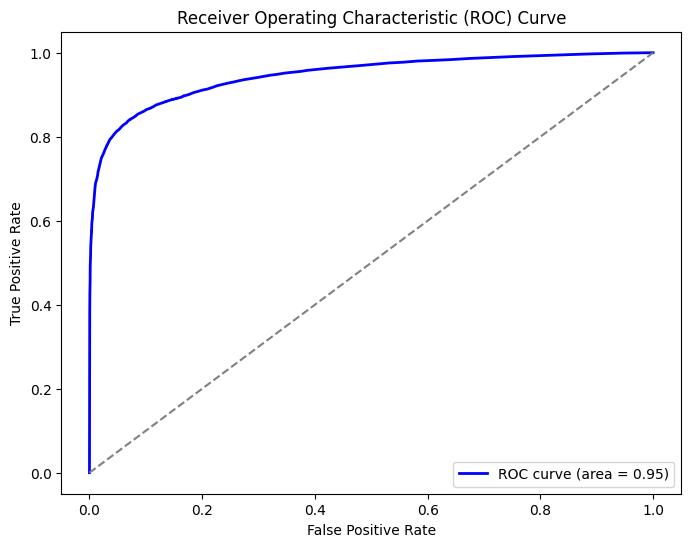

In [71]:
from sklearn.metrics import roc_curve, auc


y_probs = model.predict_proba(X_test_new)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


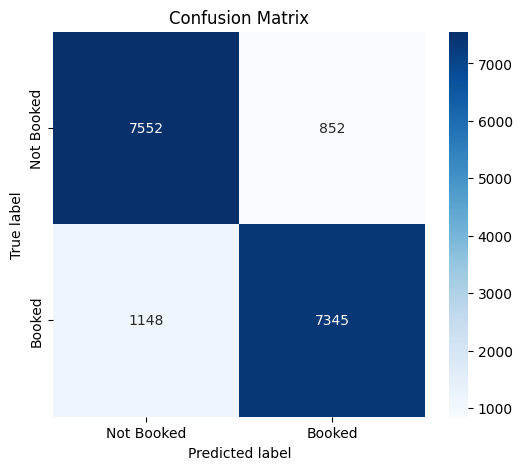

In [72]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Booked', 'Booked'], yticklabels=['Not Booked', 'Booked'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


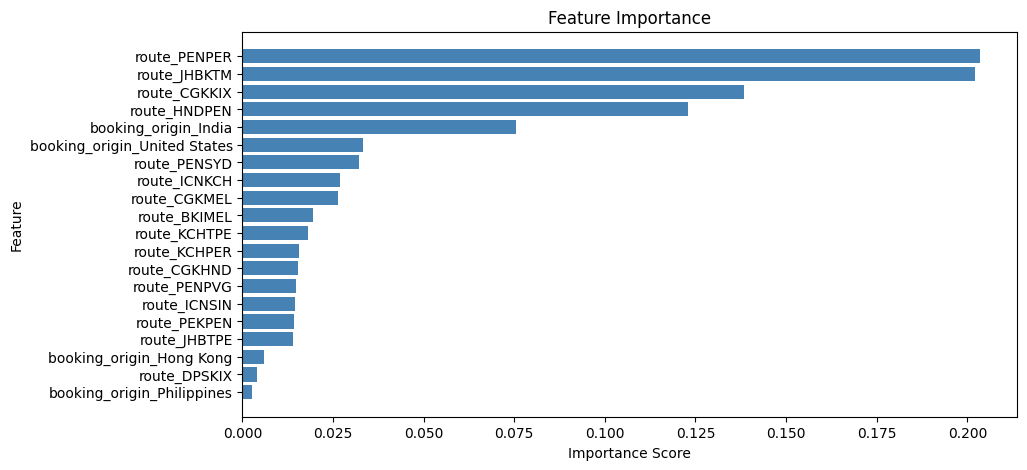

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you're using a tree-based model (like Random Forest, XGBoost)
feature_importances = model.feature_importances_
features = X_train.columns  # Your selected features

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in indices]
sorted_importances = feature_importances[indices]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(sorted_features, sorted_importances, color='steelblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show top feature at the top
plt.show()
